In [50]:
import pandas as pd
import numpy as np

LIMIT = 10
v = np.random.randint(low=-10*LIMIT, high=10*LIMIT)
num_rows = np.random.randint(low=1, high=LIMIT)
num_cols = np.random.randint(low=1, high=LIMIT)
M = np.random.randint(low=-LIMIT, high=LIMIT, size=(num_rows, num_cols))

M = M.tolist()
M_numcols = len(M[0]) 
M_numrows = len(M) 
_M = dict()
for col in range(M_numcols):
    _M[str(col)] = dict()
    for row in range(M_numrows):
        _M[str(col)][str(row)] = M[row][col]

In [51]:
v

98

In [52]:
M

[[-10, -7, -6, 5, 1, 5],
 [7, -3, -5, -7, -9, -6],
 [-3, 6, -10, 6, 4, -5],
 [-9, -2, -2, -6, -5, -4],
 [-5, 0, -3, 0, -5, 2],
 [9, -1, -3, -2, -8, 6],
 [-3, 3, 5, 8, -2, -7],
 [-5, 7, -7, -10, -7, -6]]

In [53]:
def v_exists_in_M_regualr_submatrix(v, _M):                                                                                                         # | Time Complexity | Space Complexity |
    M_numcols = len(_M)                                                                                                                             # | O(c)            | O(1)             |
    M_numrows = len(_M['0'])                                                                                                                        # | O(r)            | O(1)             |
    Exists = False                                                                                                                                  # | O(1)            | O(1)             |
    def perform_col_joins(dfs, num_rows_joined):                                                                                                    # |-----------------+------------------|
        global Exists                                                                                                                               # | O(1)            | O(1)             |
        for num_cols_joined in range(1,M_numcols):                                                                                                  # | O(c)            | O(1)             |
            if num_cols_joined == 1:                                                                                                                # | O(c)            | O(1)             |
                tmp_dict = dict()                                                                                                                   # | O(1)            | O(1)             |
                for i in range(dfs[(num_rows_joined+1, num_cols_joined)].shape[1] - 1):                                                             # | O(c)            | O(1)             | *
                    tmp_dict[i] = dfs[(num_rows_joined+1, 1)].iloc[:,i:i+2].sum(axis=1)                                                             # | O(cr)           | O(cr)            | *
                dfs[(num_rows_joined+1, num_cols_joined+1)] = pd.DataFrame(tmp_dict)                                                                # | O(cr)           | O(cr)            | *
                Exists = v in dfs[(num_rows_joined+1, num_cols_joined+1)].values                                                                    # | O(cr)           | O(1)             | *
                if Exists:                                                                                                                          # | O(1)            | O(1)             |
                    return Exists, dfs                                                                                                              # | O(1)            | O(1)             |
            else:                                                                                                                                   # | O(1)            | O(1)             |
                tmp_dict = dict()                                                                                                                   # | O(c)            | O(1)             |
                for i in range(dfs[(num_rows_joined+1, num_cols_joined)].shape[1] - 1):                                                             # | O(c^{2})        | O(1)             | *
                    tmp_dict[i] = dfs[(num_rows_joined+1, num_cols_joined)].iloc[:,i] + dfs[(num_rows_joined+1, 1)].iloc[:,i+num_cols_joined]       # | O(c^{2}r)       | O(c^{2}r)        | *
                dfs[(num_rows_joined+1, num_cols_joined+1)] = pd.DataFrame(tmp_dict)                                                                # | O(c^{2}r)       | O(c^{2}r)        | *
                Exists = v in dfs[(num_rows_joined+1, num_cols_joined+1)].values                                                                    # | O(c^{2}r)       | O(1)             | *
                if Exists:                                                                                                                          # | O(c)            | O(1)             |
                    return Exists, dfs                                                                                                              # | O(1)            | O(1)             |
        return Exists, dfs                                                                                                                          # | O(1)            | O(1)             |
                                                                                                                                                    # |-----------------+------------------|
    for num_rows_joined in range(M_numrows):                                                                                                        # | O(r)            | O(1)             |
        if num_rows_joined == 0:                                                                                                                    # | O(r)            | O(1)             |
            dfs = {}                                                                                                                                # | O(1)            | O(1)             |
            dfs[(1, 1)] = pd.DataFrame(_M)                                                                                                          # | O(rc)           | O(rc)            | *
            Exists = v in dfs[(1, 1)].values                                                                                                        # | O(rc)           | O(1)             | *
            if Exists:                                                                                                                              # | O(1)            | O(1)             |
                return Exists, dfs                                                                                                                  # | O(1)            | O(1)             |
        elif num_rows_joined == 1:                                                                                                                  # | O(r)            | O(1)             |
            tmp_dict = dict()                                                                                                                       # | O(1)            | O(1)             |
            for i in range(dfs[(num_rows_joined, 1)].T.shape[1] - 1):                                                                               # | O(r)            | O(1)             | *
                tmp_dict[i] = dfs[(1, 1)].T.iloc[:,i:i+2].sum(axis=1)                                                                               # | O(rc)           | O(rc)            | *
            dfs[(num_rows_joined+1, 1)] = pd.DataFrame(tmp_dict).T                                                                                  # | O(rc)           | O(rc)            | *
            Exists = v in dfs[(num_rows_joined+1, 1)].values                                                                                        # | O(rc)           | O(1)             | *
            if Exists:                                                                                                                              # | O(1)            | O(1)             |
                return Exists, dfs                                                                                                                  # | O(1)            | O(1)             |
        else:                                                                                                                                       # | O(r)            | O(1)             |
            tmp_dict = dict()                                                                                                                       # | O(r)            | O(1)             |
            for i in range(dfs[(num_rows_joined, 1)].T.shape[1] - 1):                                                                               # | O(r^{2})        | O(1)             |
                tmp_dict[i] = dfs[(num_rows_joined, 1)].T.iloc[:,i] + dfs[(1, 1)].T.iloc[:,i+2]                                                     # | O(r^{2}c)       | O(r^{2}c)        | *
            dfs[(num_rows_joined+1, 1)] = pd.DataFrame(tmp_dict).T                                                                                  # | O(r^{2}c)       | O(r^{2}c)        | *
            Exists = v in dfs[(num_rows_joined+1, 1)].values                                                                                        # | O(r^{2}c)       | O(1)             |
            if Exists:                                                                                                                              # | O(r)            | O(1)             |
                return Exists, dfs                                                                                                                  # | O(1)            | O(1)             |
                                                                                                                                                    # |-----------------+------------------|
    for num_rows_joined in range(M_numrows):                                                                                                        # | O(r)            | O(1)             |
        Exists, dfs = perform_col_joins(dfs, num_rows_joined)                                                                                       # | O(r^{2}c^{2})   | O(r^{2}c^{2})    | *
        if Exists:                                                                                                                                  # | O(r)            | O(1)             |
            return Exists, dfs                                                                                                                      # | O(1)            | O(1)             |
        # for num_cols_joined in range(M_numcols):                                                                                                    # | O(r)            | O(1)             |
        #     del dfs[(num_rows_joined+1, num_cols_joined+1)]                                                                                         # | O(r)            | O(-rc^{2})       | *
    return Exists, dfs                                                                                                                              # | O(1)            | O(1)             |

In [54]:
Exists, dfs = v_exists_in_M_regualr_submatrix(v, _M)

print(v, 'exisits in the rectangular submatrix of M? . . .', Exists)

98 exisits in the rectangular submatrix of M? . . . False


In [55]:
dfs

{(1,
  1):     0  1   2   3  4  5
 0 -10 -7  -6   5  1  5
 1   7 -3  -5  -7 -9 -6
 2  -3  6 -10   6  4 -5
 3  -9 -2  -2  -6 -5 -4
 4  -5  0  -3   0 -5  2
 5   9 -1  -3  -2 -8  6
 6  -3  3   5   8 -2 -7
 7  -5  7  -7 -10 -7 -6,
 (2,
  1):     0   1   2  3   4   5
 0  -3 -10 -11 -2  -8  -1
 1   4   3 -15 -1  -5 -11
 2 -12   4 -12  0  -1  -9
 3 -14  -2  -5 -6 -10  -2
 4   4  -1  -6 -2 -13   8
 5   6   2   2  6 -10  -1
 6  -8  10  -2 -2  -9 -13,
 (3,
  1):     0  1   2  3   4   5
 0  -6 -4 -21  4  -4  -6
 1  -5  1 -17 -7 -10 -15
 2 -17  4 -15  0  -6  -7
 3  -5 -3  -8 -8 -18   4
 4   1  2  -1  6 -15   1
 5   1  9  -5 -4 -17  -7,
 (4,
  1):     0  1   2   3   4   5
 0  -9  2 -31  10   0 -11
 1 -14 -1 -19 -13 -15 -19
 2 -22  4 -18   0 -11  -5
 3   4 -4 -11 -10 -26  10
 4  -2  5   4  14 -17  -6,
 (5,
  1):     0  1   2   3   4   5
 0 -12  8 -41  16   4 -16
 1 -23 -3 -21 -19 -20 -23
 2 -27  4 -21   0 -16  -3
 3  13 -5 -14 -12 -34  16,
 (6,
  1):     0   1   2   3   4   5
 0 -15  14 -51  22   8 

---
# Pseudocode

```python
    # Input value (v) and matrix (M)                                                        # | Explanation                                              | Time Complexity | Space Complexity |
    # Return Boolean                                                                        # |----------------------------------------------------------+-----------------+------------------|        
def exists_in_regular_submatrix_sum(v,M):                                                   # | Function Declaration                                     | O(1)            | O(1)             |
    c = M.num_cols                                                                          # | Column Count                                             | O(c)            | O(1)             |
    r = M.num_rows                                                                          # | Row Count                                                | O(r)            | O(1)             |
    dfs = {}                                                                                # | Dictionary Initialization                                | O(1)            | O(1)             |
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
                                                                                            # |--------------------  Compute All Possible Row Joins W/ No Column Joins   ---------------------|
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
    for num_rows_joined in range(1, r + 1):                                                 # | For all possible row joins                               | O(r)            | O(1)             |
        if num_rows_joined == 1:                                                            # | if no joins are preformed                                | O(r)            | O(1)             |
            dfs[(1, 1)] <- "Matrix"                                                         # | initialize matrix                                        | O(1)            | O(1)             |
            for row in range(1, r + 1):                                                     # | for each row in M                                        | O(r)            | O(1)             |
                for col in range(1, c + 1):                                                 # | for each column in M                                     | O(rc)           | O(1)             |
                    submatrix_sum = M[row][col]                                             # | compute the submatrix sum                                | O(rc)           | O(1)             |
                    if v == submatrix_sum:                                                  # | if the sum is equal to v                                 | O(rc)           | O(1)             |
                        return True                                                         # | problem solved, return true                              | O(1)            | O(1)             |
                    dfs[(1, 1)][row][col] = submatrix_sum                                   # | else, set sum to value in derivative matrix              | O(rc)           | O(rc)            |
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
        elif num_rows_joined == 2:                                                          # | if 2 rows are joined                                     | O(r)            | O(1)             |
            dfs[(2, 1)] <- "Matrix"                                                         # | initialize matrix                                        | O(1)            | O(1)             |
            for row in range(1, r + 2 - num_rows_joined):                                   # | for the first r-1 rows                                   | O(r)            | O(1)             |
                for col in range(1, c + 1):                                                 # | for all columns                                          | O(rc)           | O(1)             |
                    submatrix_sum = (                                                       # | compute submatrix sum =                                  | O(rc)           | O(1)             |
                        dfs[(1, 1)][row][col]                                               # | initial matrix row,col value                             |-----------------+------------------|
                        +                                                                   # | +                                                        |----------------=+=-----------------|
                        dfs[(1, 1)][row + 1][col]                                           # | initial matrix next_row,col value                        |----------------=+=-----------------|
                    )                                                                       # |----------------------------------------------------------+-----------------+------------------|
                    if v == submatrix_sum:                                                  # | if the sum is equal to v                                 | O(rc)           | O(1)             |
                        return True                                                         # | problem solved, return true                              | O(1)            | O(1)             |
                    dfs[(2, 1)][row][col] = submatrix_sum                                   # | else, set sum to value in derivative matrix              | O(rc)           | O(rc)            |
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
        else:                                                                               # | if 3 or more rows are joined                             | O(r)            | O(1)             |
            dfs[(num_rows_joined, 1)] <- "Matrix"                                           # | initialize matrix                                        | O(r)            | O(r)             |
            for row in range(1, r + 2 - num_rows_joined):                                   # | for the first r+1-num_rows_joined rows                   | O(r^{2})        | O(1)             |
                for col in range(1, c + 1):                                                 # | for all columns                                          | O(r^{2}c)       | O(1)             |
                    submatrix_sum = (                                                       # | compute submatrix sum =                                  | O(r^{2}c)       | O(1)             |
                        dfs[(num_rows_joined - 1, 1)][row][col]                             # | previous derivative matrix row,col value                 |-----------------+------------------|
                        +                                                                   # | +                                                        |----------------=+=-----------------|
                        dfs[(1, 1)][row + num_rows_joined - 1][col]                         # | initial matrix next_unsummed_row,col value               |----------------=+=-----------------|
                    )                                                                       # |----------------------------------------------------------+-----------------+------------------|
                    if v == submatrix_sum:                                                  # | if the sum is equal to v                                 | O(r^{2}c)       | O(1)             |
                        return True                                                         # | problem solved, return true                              | O(1)            | O(1)             |
                    dfs[(num_rows_joined, 1)][row][col] = submatrix_sum                     # | else, set sum to value in derivative matrix              | O(r^{2}c)       | O(r^{2}c)        |
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
                                                                                            # |---------------  Compute All Possible Column Joins For All Possible Row Joins  ----------------|
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
    for num_rows_joined in range(1, r + 1):                                                 # | For all possible row joins                               | O(r)            | O(1)             |
        for num_cols_joined in range(2, c + 1):                                             # | For all column joins > 1                                 | O(rc)           | O(1)             |
            if num_cols_joined == 2:                                                        # | if 2 columns are joined                                  | O(rc)           | O(1)             |
                dfs[(num_rows_joined, 2)] <- "Matrix"                                       # | initialize matrix                                        | O(r)            | O(r)             |
                for row in range(1, r + 2 - num_rows_joined):                               # | for the first r+1-num_rows_joined rows                   | O(r^{2})        | O(1)             |
                    for col in range(1, c + 2 - num_cols_joined):                           # | for the first c+1-num_cols_joined columns                | O(r^{2}c)       | O(1)             |
                        submatrix_sum = (                                                   # | compute submatrix sum =                                  | O(r^{2}c)       | O(1)             |
                            dfs[(num_rows_joined, 1)][row][col]                             # | initial derivative matrix row,col value                  |-----------------+------------------|
                            +                                                               # | +                                                        |----------------=+=-----------------|
                            dfs[(num_rows_joined, 1)][row][col + 1]                         # | initial derivative matrix next_row,col value             |----------------=+=-----------------|
                        )                                                                   # |----------------------------------------------------------+-----------------+------------------|
                        if v == submatrix_sum:                                              # | if the sum is equal to v                                 | O(r^{2}c)       | O(1)             |
                            return True                                                     # | problem solved, return true                              | O(1)            | O(1)             |
                        dfs[(num_rows_joined, 2)][row][col] = submatrix_sum                 # | else, set sum to value in derivative matrix              | O(r^{2}c)       | O(r^{2}c)        |
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
            else:                                                                           # | if 3 or more columns are joined                          | O(rc)           | O(1)             |
                dfs[(num_rows_joined, num_cols_joined)] <- "Matrix"                         # | initialize matrix                                        | O(rc)           | O(rc)            |
                for row in range(1, r + 2 - num_rows_joined):                               # | for the first r+1-num_rows_joined rows                   | O(r^{2}c)       | O(1)             |
                    for col in range(1, c + 2 - num_cols_joined):                           # | for the first c+1-num_cols_joined columns                | O(r^{2}c^{2})   | O(1)             |
                        submatrix_sum = (                                                   # | compute submatrix sum =                                  | O(r^{2}c^{2})   | O(1)             |
                            dfs[(num_rows_joined, num_cols_joined - 1)][row][col]           # | previous derivative matrix row,col value                 |-----------------+------------------|
                            +                                                               # | +                                                        |----------------=+=-----------------|
                            dfs[(num_rows_joined, 1)][row][col + num_cols_joined - 1]       # | initial derivative matrix row,next_unsummed_col value    |----------------=+=-----------------|
                        )                                                                   # |----------------------------------------------------------+-----------------+------------------|
                        if v == submatrix_sum:                                              # | if the sum is equal to v                                 | O(r^{2}c^{2})   | O(1)             |
                            return True                                                     # | problem solved, return true                              | O(1)            | O(1)             |
                        dfs[(num_rows_joined, num_cols_joined)][row][col] = submatrix_sum   # | else, set sum to value in derivative matrix              | O(r^{2}c^{2})   | O(r^{2}c^{2})    |
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
        for num_cols_joined in range(1, c + 1):                                             # | For all possible column joins                            | O(rc)           | O(1)             |
            del dfs[(num_rows_joined, num_cols_joined)]                                     # | delete the derivative matrices with num_rows_joined rows | O(rc)           | -O(r^{2}c^{2})   |
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
                                                                                            # |--------------------------   No Possible Submatrix has Summed to V   --------------------------|
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
    return False                                                                            # | if no sum found equal to v then return false             | O(1)            | O(1)             |
                                                                                            # |----------------------------------------------------------+-----------------+------------------|
```

<!-- $\displaystyle \sum_{i=1}^{r} (r + 1 - i) \times (c + 1 - j) $ where $ j = 1 $ \
$\displaystyle \sum_{i=1}^{r} \sum_{j=1}^{c} \Bigl[ ij \times (r + 1 - i) \times (c + 1 - j) \Bigr] $ where $ j = 1 $ \
$\displaystyle \sum_{j=1}^{c} (r + 1 - i) \times (c + 1 - j) $ for a fixed $ i $ \
$\displaystyle \sum_{i=1}^{r} \sum_{j=1}^{c} \Bigl[ ij \times (r + 1 - i) \times (c + 1 - j) \Bigr] $ for a fixed $ i $ -->

---
# Number of rectangular submatrices in $M$

let $r$ be the number of rows, and $c$ the number of columns in $M$ respectively...

There are $\displaystyle (r + 1 - i) \times (c + 1 - j) $,  $i \times j$ submatrices respectively.

if we consider all possible rows we have $\displaystyle \sum_{i=1}^{r} (r + 1 - i) \times (c + 1 - j) $ possible matrices with with a fixed number of columns: $j$.

if we consider all possible columns we have $\displaystyle \sum_{j=1}^{c} (r + 1 - i) \times (c + 1 - j) $ possible matrices with with a fixed number of rows: $i$.

We must consider all combinations of $i \ \& \ j$, thus we arrive at the following number of possible submatrices:

$\displaystyle \sum_{i=1}^{r} \sum_{j=1}^{c} \Bigl[ (r + 1 - i) \times (c + 1 - j) \Bigr] = \sum_{i=1}^{r} (r + 1 - i) \sum_{j=1}^{c} (c + 1 - j) = \sum_{i=1}^{r'} (r' - i) \sum_{j=1}^{c'} (c' - j)$ where $r' = r + 1 \ \& \ c' = c + 1$

continuing, we have $\displaystyle \sum_{i=1}^{r'} (r' - i) \sum_{j=1}^{c'} (c' - j) = \sum_{i=1}^{r'-1} i \sum_{j=1}^{c'-1} j = \sum_{i=1}^{r} i \sum_{j=1}^{c} j = \frac{r(r+1)}{2} \times \frac{c(c+1)}{2} \approx r^{2}c^{2}$ 


This analysis provides a theoretical `lower bound` on the `upper bound` of `time complexity`, e.g. we must check the sum of at most $\displaystyle \frac{(r(r+1))(c(c+1))}{4}$, $\mathcal{O}(r^{2}c^{2})$, submatrices, but this scales with the number of computations required to compute the sum $\dots$

---
# Introducing `Time Complexity`

let $r$ be the number of rows, and $c$ the number of columns in $M$ respectively...

As before we have show there are a total of $\displaystyle \frac{(r(r+1))(c(c+1))}{4}$ submatricies. 

A basic brute force would compute the sum of each of these submatrices by adding all of the elements. 

Given an $i \times j$ submatrix, there is $ij$ elements to add, requiring $ij - 1$ addition operations. 
- As we must also compare the sum to our value, $v$, we perform at least $ij$ operations for each of the submatricies. 

Again, for each dimension $i \times j$, there exist $\displaystyle (r + 1 - i) \times (c + 1 - j) $ unique occurrences within $M$. 

Going forward, for each dimension $i \times j$, we must perform $\displaystyle ij \times (r + 1 - i) \times (c + 1 - j) $ operations to compute all submatrix sums and check their equality to $v$. 

Considering all possible submatrices, we can solve for the number of operations required to compute all possible submatrices' sums, giving an `upper bound` on the `time complexity` of this brute force algo:

$\displaystyle \sum_{i=1}^{r} \sum_{j=1}^{c} \Bigl[ ij \times (r + 1 - i) \times (c + 1 - j) \Bigr] = \frac{r(r+1)(r+2)}{6} \times \frac{c(c+1)(c+2)}{6} \approx r^{3}c^{3} $. 

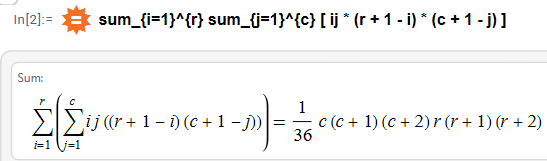

### e.g. this brute force algo has an `upper bound` on `time complexity` of $\mathcal{O}(r^{3}c^{3})$

To put what is going on here in context, there is an inverse relationship between the number of addition operations performed and the number of existing submatrices, or equally the number of comparisons required. 

# Improving `Time Complexity`

let $r$ be the number of rows, and $c$ the number of columns in $M$ respectively...

As before we have show there are a total of $\displaystyle \frac{(r(r+1))(c(c+1))}{4}$ submatricies. 

In our algorithm we need only add $2$ values and check their equivalence to $v$.
- In the very first iteration, cosidering $1 \times 1$ submatrices we need not even add values, but just check if $v$ exists in $M$, a total of $rc$ operations. 

Again, for each dimension $i \times j$, there exist $\displaystyle (r + 1 - i) \times (c + 1 - j) $ unique occurrences within $M$. 

Going forward, for each dimension $i \times j$, we must perform $\displaystyle 2 \times (r + 1 - i) \times (c + 1 - j) $ operations to compute all submatrix sums and check their equality to $v$. 

Considering all possible submatrices, we can solve for the number of operations required to compute all possible submatrices' sums.

$\displaystyle rc + \sum_{i=1}^{r-1} \sum_{j=1}^{c-1} \Bigl[ 2 \times (r + 1 - i) \times (c + 1 - j) \Bigr] = rc + 2 \times \sum_{i=1}^{r-1} i \sum_{j=1}^{c-1} j = rc + \frac{(r-1)r}{2} \times \frac{(c-1)c}{2} \approx r^{2}c^{2} $. 

### e.g. this optimized algo has an `upper bound` on `time complexity` of $ T(r, c) = \mathcal{O}(r^{2}c^{2}) $

---
# Introducing `Space Complexity`

let $r$ be the number of rows, and $c$ the number of columns in $M$ respectively...

As before we have show there are a total of $\displaystyle \frac{(r(r+1))(c(c+1))}{4}$ submatricies. 

A basic algorithm would compute and store the sum of each of these submatrices by adding all of the elements. 

Thus there would be a need to store $\displaystyle \frac{(r(r+1))(c(c+1))}{4}$ sums. 

# Improving `Space Complexity`

let $r$ be the number of rows, and $c$ the number of columns in $M$ respectively...

In our algo, we first consider all $ i \times c $ submatricies for natural i such that $ 0 < i \le r $.

We then consider all $ r \times j $ submatricies for natural j such that $ 1 < j \le c $.

Continuing, we consider all $ r - 1 \times j $ submatricies for natural j such that $ 1 < j \le c $.

To `improve` our `space complexity`, we leverage that considering $ r - 1 \times j $ submatricies need no information from the $ r \times j $ submatricies, and thus the $ r \times j $ submatricies can be garbage collected. 

After the first row and column-wise iteration we store $\displaystyle \sum_{i = 1}^{r} ic + \sum_{j = 1}^{c} jr - rc = \frac{rc(r + 1)}{2} + \frac{rc(c + 1)}{2} - rc = \frac{rc(r + c)}{2} \approx r^{2}c + rc^{2} $ values.

Following this iteration we delete the submatrice sums with row-wise dimension $ 1 $, continuing on with those having row-wise dimension $ 2 $. 

Thus in the second iteration we store $\displaystyle \sum_{i = 1}^{r - 1} ic + \sum_{j = 1}^{c} j(r - 1) = \frac{rc(r - 1)}{2} + \frac{c(r - 1)(c + 1)}{2} - c(r - 1) = \frac{c(r - 1)(r + c - 1)}{2} \approx r^{2}c + rc^{2} $

the third iteration we store $\displaystyle \sum_{i = 1}^{r - 2} ic + \sum_{j = 1}^{c} j(r - 2) = \frac{c(r - 2)(r - 1)}{2} + \frac{c(r - 2)(c + 1)}{2} - c(r - 2) = \frac{c(r - 2)(r + c - 2)}{2} \approx r^{2}c + rc^{2} $


### From this analysis, we can see then we achieve an `upper bound` on `space complexity` of $ S(r,c) = \mathcal{O}(rc(r + c)) $.

----
# `Loop Invariant`

## At the start and end of each iteration of a `for` loop in the algorithm, there exists a rectangular submatrix in $M$ who's sum we have not computed, we have just found a sum equal to $v$, or there exists no rectangular submatrix in $M$ who's sum is equal to $v$.

## **Initialization:** We have computed no rectangular submatrix sum of $M$. Thus the invariant holds prior to the first iteration of the loop.

## **Maintenance:** Within every loop, we enter with some sums not yet computed. In the loop we compute between $1$ and $r^{2}c^{2}$ sums. If a sum is found to be equal to $v$ we will terminate, and are invariant as we exit the loop having just found a sum equal to $v$. Otherwise if no sum is found equal to $v$, we are invariant as either there still exist more sums to compute, or otherwise there is no sum equal to $v$ for any rectangular submatrix in $M$. The useful fact about this invariant is that each iteration results in less sums we have not computed.

## **Termination (Sum Found):** This termination is a special case of maintenance, the sum is found, shown invariant above.

## **Termination (Sum UnFound):** In the case we terminate without finding a sum, there exists either more sums to check in a different loop, or we have reached the case in which there exists no rectangular submatrix in $M$ who's sum is equal to $v$. Either way we are invariant.

----

<!-- ---
# Pseudocode
---
```
dfs is a dictionary of matrices
- It is indexed on submatrix dimension and stores the sum of all submatrices with that dimension
```
---
```
# tmp_dict[i] = dfs[(num_rows_joined+1, 1)].iloc[:,i:i+2].sum(axis=1)

data = dfs[(num_rows_joined+1, 1)]                          \\ Matrix
summed_data = Vector
for row in rows:                                           
    summed_data[row] = data[row,i] + data[row,i+1]          \\ Join two column values for a fixed row
tmp_dict[i] = summed_data                                   \\ new matrix column vector
```
---
```
# dfs[(num_rows_joined+1, num_cols_joined+1)] = pd.DataFrame(tmp_dict)

data = Matrix
for i in possible_number_of_column_joins:
    data[:,i] = tmp_dict[i]                                 \\ Insert calculated column i into data
dfs[(num_rows_joined+1, num_cols_joined+1)] = data          \\ Insert summation matrix into dictionary
```
---
```
# tmp_dict[i] = dfs[(num_rows_joined+1, num_cols_joined)].iloc[:,i] + dfs[(num_rows_joined+1, 1)].iloc[:,i+num_cols_joined]
previous_summed_data = dfs[(num_rows_joined+1, num_cols_joined)]
previous_base_data = dfs[(num_rows_joined+1, 1)]
summed_data = Vector
for row in rows:                                           
    summed_data[row] = previous_summed_data[row,i] + previous_base_data[row, i+num_cols_joined]       \\ Join two column values for a fixed row
tmp_dict[i] = summed_data                                                                             \\ new matrix column vector
```
---
```
# tmp_dict[i] = dfs[(1, 1)].T.iloc[:,i:i+2].sum(axis=1)

data = dfs[(1, 1)]                                         \\ Matrix
summed_data = Vector
for col in cols:                                           
    summed_data[col] = data[i,col] + data[i+1, col]         \\ Join two column values for a fixed column
tmp_dict[i] = summed_data                                   \\ new matrix row vector
```
---
```
# dfs[(num_rows_joined+1, 1)] = pd.DataFrame(tmp_dict).T

data = Matrix
for i in possible_number_of_row_joins:
    data[i,:] = tmp_dict[i]                                 \\ Insert calculated row i into data
dfs[(num_rows_joined+1, num_cols_joined+1)] = data          \\ Insert summation matrix into dictionary
```
---
```
# tmp_dict[i] = dfs[(num_rows_joined, 1)].T.iloc[:,i] + dfs[(1, 1)].T.iloc[:,i+2]
previous_summed_data = dfs[(num_rows_joined, 1)]
previous_base_data = dfs[(1, 1)]
summed_data = Vector
for col in cols:                                           
    summed_data[col] = previous_summed_data[i,col] + previous_base_data[i+num_rows_joined,col]        \\ Join two row values for a fixed column
tmp_dict[i] = summed_data                                                                             \\ new matrix row vector
```
---
<!-- # ```                  
# function perform_col_joins(summation_matrix, value, M, M_num_cols, M_num_rows):                 | Time Complexity        | Space Complexity       |
#     summation = Object Matrix                                                                   | O(1)                   | O(1)                   |
#     for row in [0:M_num_rows]:                                                                  |------------------------+------------------------|
#         value = M[row, 0] + M[row, 1]                                                           | O(M_num_rows)          | O(M_num_rows)          |
#         if v == value:                                                                          |------------------------+------------------------|
#             return True                                                                         | O(1)                   | O(1)                   |
#         else:                                                                                   |------------------------+------------------------|
#             summation[row,0] = value                                                            | O(M_num_rows)          | O(M_num_rows)          |
#     for col in [1:num_cols-1]:                                                                  |------------------------+------------------------|
#         for row in [0:M_num_rows]:                                                              |------------------------+------------------------|
#             summation[row,col] = summation_matrix[row, col] + M[row, col+1]                     | O(num_cols*M_num_rows) | O(num_cols*M_num_rows) |
#     perform_col_joins(summation, value, M[:,1:], M_num_cols-1, M_num_rows)                         | O(rc)           | O(1)             |
#                                                           | O(1)            | O(1)             |

# function v_exists_in_M_regualr_submatrix(value, M):          | Time Complexity | Space Complexity |
#     for v in M:                                              |-----------------+------------------|
#         if value == v:                                       | O(rc)           | O(1)             |
#             return True                                      | O(1)            | O(1)             |
#                                                              |-----------------+------------------|
#     num_rows = number of rows in M                           | O(r)            | O(1)             |
#     num_cols = number of cols in M                           | O(c)            | O(1)             |
#     summation_matrix = Object Matrix                         | O(1)            | O(1)             |

# ``` --> -->